<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#KMeans-Demo" data-toc-modified-id="KMeans-Demo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>KMeans Demo</a></span></li><li><span><a href="#Workshop-K-Means" data-toc-modified-id="Workshop-K-Means-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Workshop K-Means</a></span><ul class="toc-item"><li><span><a href="#Convert-shapes-and-color-to-'numbers'" data-toc-modified-id="Convert-shapes-and-color-to-'numbers'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Convert shapes and color to 'numbers'</a></span></li><li><span><a href="#Apply-K-means-model" data-toc-modified-id="Apply-K-means-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Apply K-means model</a></span></li><li><span><a href="#Result-evaluation" data-toc-modified-id="Result-evaluation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Result evaluation</a></span></li><li><span><a href="#Try-K-modes" data-toc-modified-id="Try-K-modes-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Try K-modes</a></span></li><li><span><a href="#Evalution-of-K-Modes" data-toc-modified-id="Evalution-of-K-Modes-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Evalution of K-Modes</a></span></li><li><span><a href="#Some-alternatives" data-toc-modified-id="Some-alternatives-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Some alternatives</a></span><ul class="toc-item"><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#Hierarchical-clustering" data-toc-modified-id="Hierarchical-clustering-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Hierarchical clustering</a></span></li><li><span><a href="#Simple-example-Dendrogram" data-toc-modified-id="Simple-example-Dendrogram-3.6.3"><span class="toc-item-num">3.6.3&nbsp;&nbsp;</span>Simple example Dendrogram</a></span></li><li><span><a href="#Evaluation-Hierarchical-clustering" data-toc-modified-id="Evaluation-Hierarchical-clustering-3.6.4"><span class="toc-item-num">3.6.4&nbsp;&nbsp;</span>Evaluation Hierarchical clustering</a></span></li></ul></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Appendix-visualizing-K-Mode" data-toc-modified-id="Appendix-visualizing-K-Mode-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Appendix visualizing K-Mode</a></span></li></ul></li></ul></div>

# Intro

This notebook accompanies a presentation/workshop on data science 

In [207]:
#Import a load of packages
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)

# KMeans Demo

Demo to demonstrate principle in a 2-D environment. The workshop example is multi dimensional. 

In [115]:
%matplotlib inline

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

#create data
X, y = make_blobs(
    n_samples    =  200, 
    centers      =  5, 
    n_features   =  2,
    random_state =  0
)

#put in a df
df = pd.DataFrame(X, columns=['x', 'y'])
df.head()

,x,y
0,1.360700,0.748029
1,-3.278940,9.899953
2,0.588943,4.001485
3,-0.973739,6.944545
4,2.431693,-0.201737


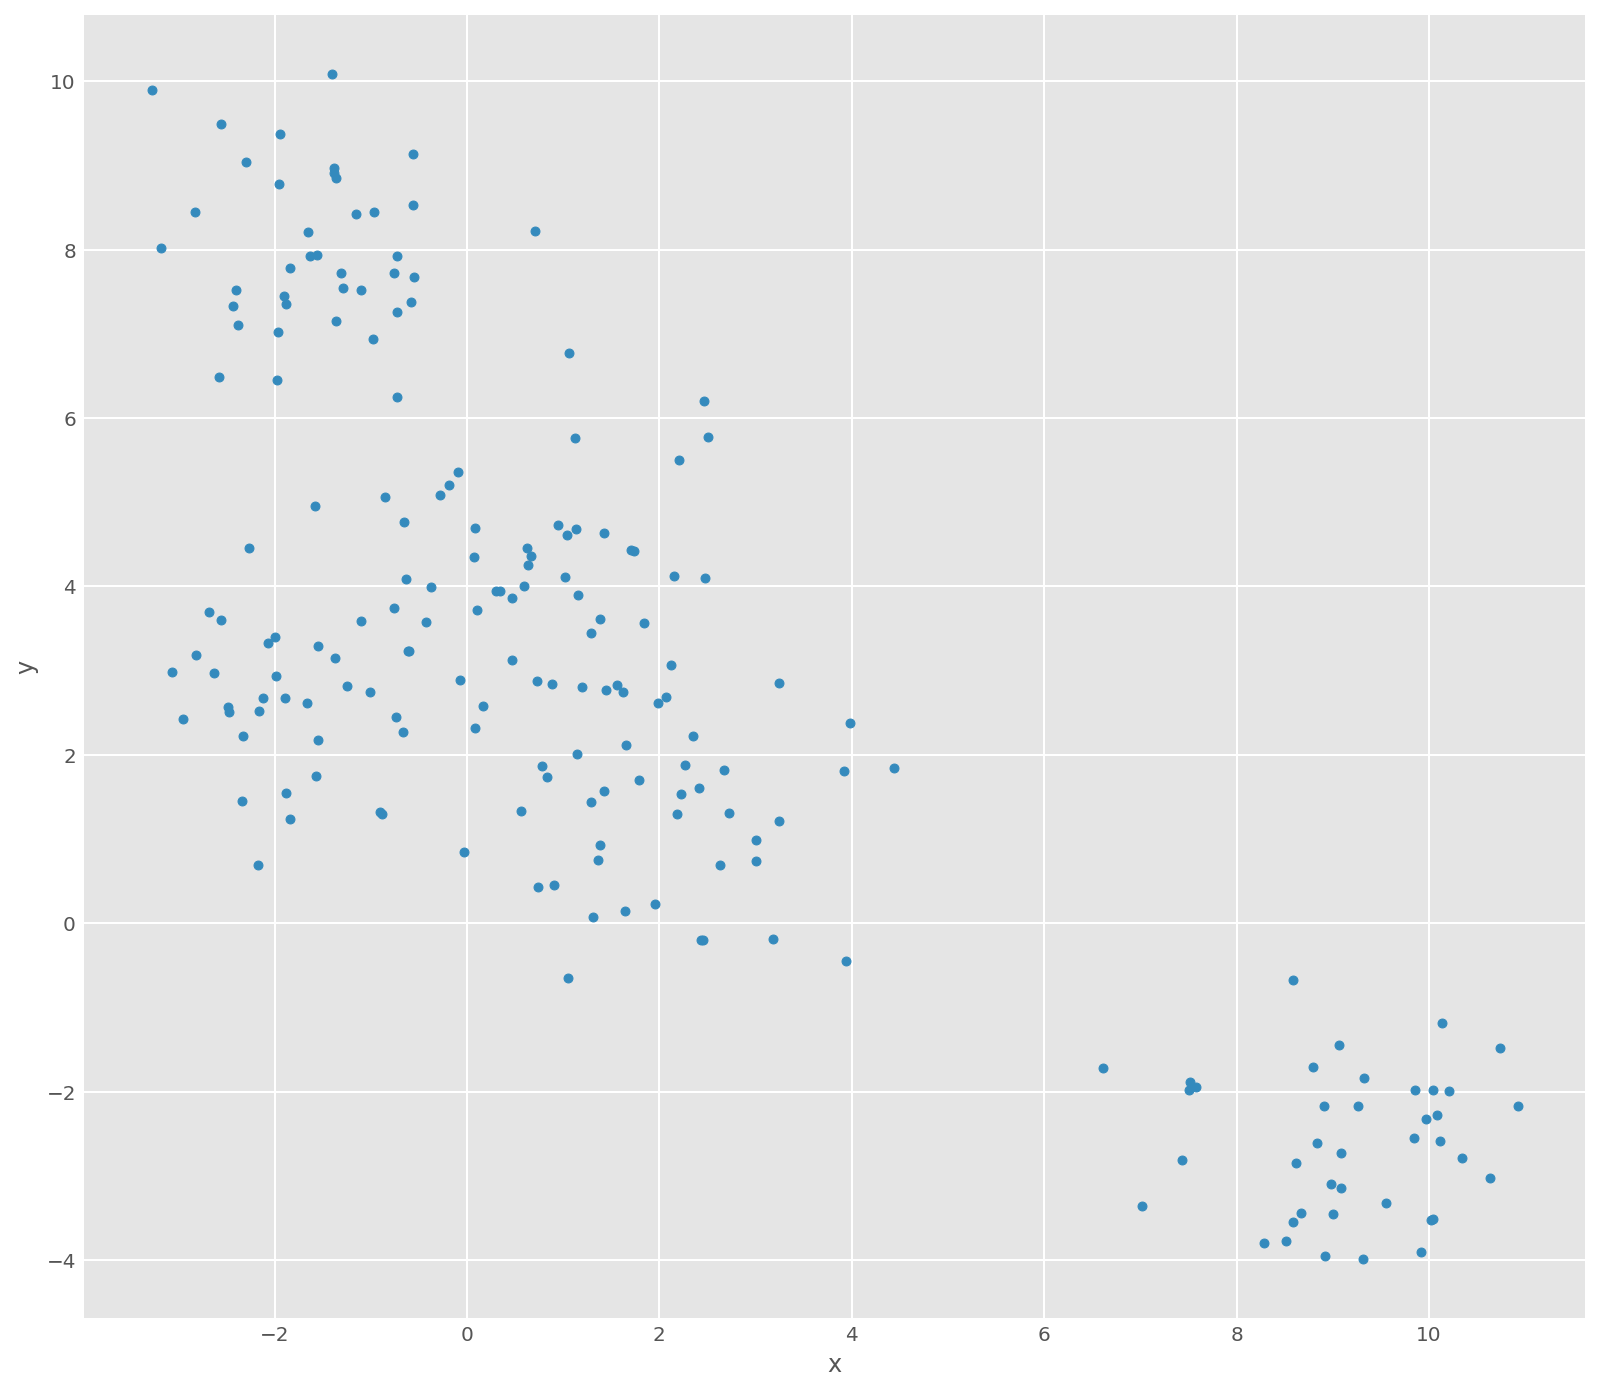

In [116]:
#Vizualise
df.plot(kind="scatter", x="x", y="y", figsize=(12, 12));

In [118]:
#run model
model = KMeans(n_clusters=4, random_state=0).fit(df)

In [119]:
predicted = model.labels_
centroids = model.cluster_centers_

print ("Predicted clusters to points: ", predicted)
print ("Location of centroids: ")
print (centroids)

Predicted clusters to points:  [0 2 3 2 0 3 3 3 3 0 0 0 1 3 3 0 3 2 2 0 2 3 0 2 1 0 2 2 1 2 0 3 3 3 3 0 1
 2 0 3 3 3 3 0 1 1 1 0 0 2 3 0 2 0 1 1 3 2 1 0 1 1 3 3 3 1 3 0 0 1 1 0 1 3
 2 1 3 3 3 0 2 3 0 0 2 2 3 3 1 1 2 1 2 2 3 3 0 3 1 3 3 3 1 0 0 1 1 2 3 3 0
 3 1 2 3 0 3 3 3 3 1 3 1 3 3 3 3 2 0 3 3 3 2 0 2 1 3 3 1 1 0 1 3 3 2 0 0 2
 0 3 3 2 1 1 1 3 2 3 0 1 2 2 3 2 0 3 2 2 1 3 3 3 0 0 3 2 1 2 2 0 0 3 0 3 3
 3 3 3 2 2 1 3 0 0 0 0 1 1 3 2]
Location of centroids: 
[[ 2.05509413  1.55336203]
 [ 9.14794457 -2.61667701]
 [-1.48385442  7.97740229]
 [-0.55060131  3.49957061]]


In [120]:
#assign label to df
df['predicted'] = predicted
df.head()

,x,y,predicted
0,1.360700,0.748029,0
1,-3.278940,9.899953,2
2,0.588943,4.001485,3
3,-0.973739,6.944545,2
4,2.431693,-0.201737,0


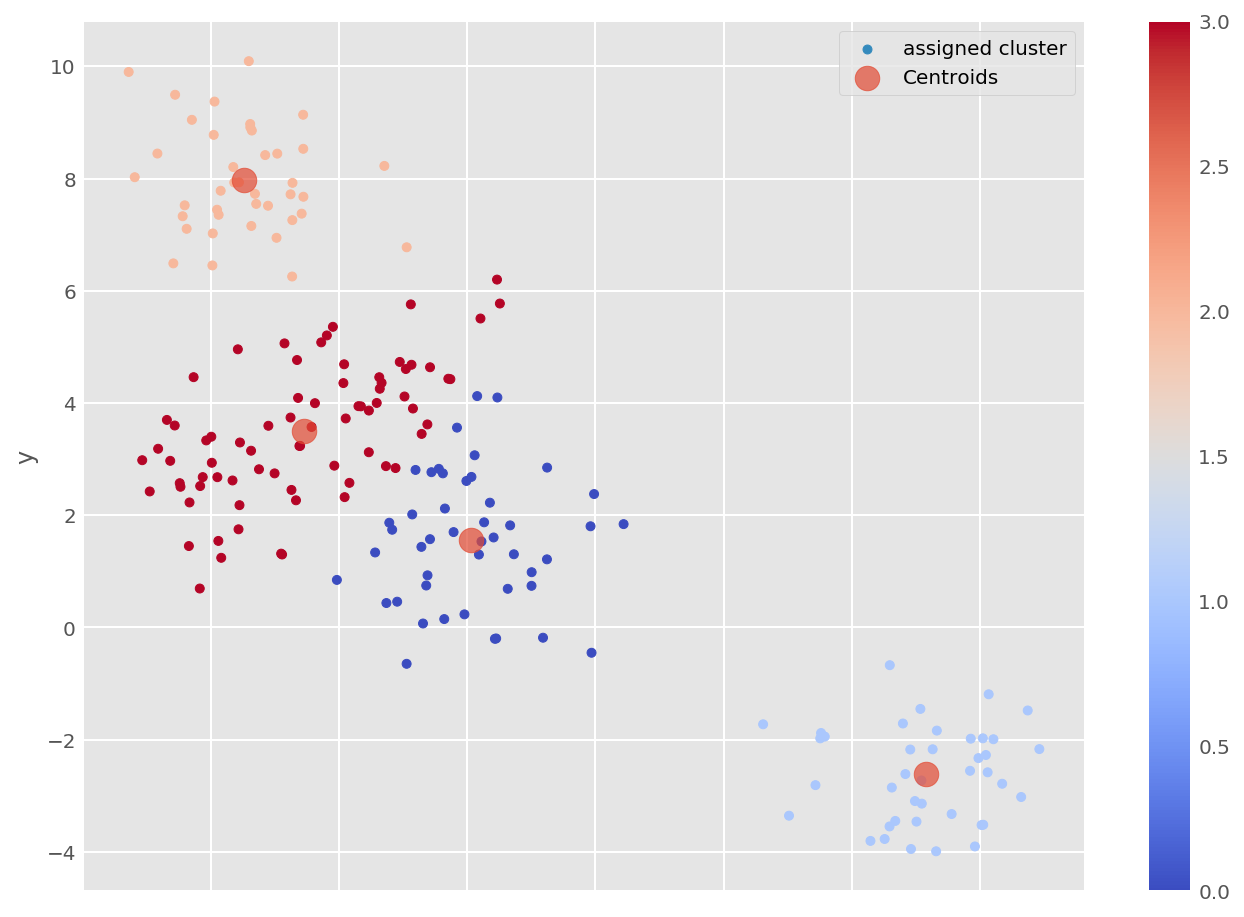

In [134]:
#plot labels and centroids
from matplotlib import pyplot as plt

df.plot(x="x", y="y", kind="scatter", c=df['predicted'], cmap='coolwarm', figsize=(10,8), label = 'assigned cluster' );
plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=0.7, label= 'Centroids')
plt.legend();

In [8]:
#show score
score = silhouette_score(df, predicted, metric='euclidean')
score

0.6069968845106598

# Workshop K-Means

## Convert shapes and color to 'numbers'

In order for any model to work in Data Science the shapes have been converted to numbers by capturing the dimensions like length, width, diagonal in cm. The color is operationalised  by taking the color wavelength in nm (nanometers)

In [116]:
#import data
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)
np.random.seed(12345)
df = df.reindex(np.random.permutation(df.index))# (shuffle the data for demo purposes)
df

,coltemp,color,shape,width,length,diameter,angles,sharp angles,obtus angles,rightangle
33,475,blue,octagon,6,6,6,8,0,8,0
21,575,yellow,hexagon,7,6,7,6,0,6,0
12,710,red,hexagon,7,6,7,6,0,6,0
26,575,yellow,trirightangle,8,6,4,3,2,0,1
32,475,blue,diamond,5,4,7,4,2,2,0
8,530,green,trirightangle,8,6,4,3,2,0,1
20,575,yellow,square,6,6,8,4,0,0,4
30,475,blue,hexagon,7,6,7,6,0,6,0
39,610,orange,hexagon,7,6,7,6,0,6,0
2,530,green,square,6,6,8,4,0,0,4


## Apply K-means model

K-means model is applied for 2 to 9 groupings and results are displayed 

In [172]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# import data
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)

# define X
X = df.drop(df[['shape', 'color']], axis=1)

# scale
ss = StandardScaler()
ss.fit_transform(X)

# Loop through k and append results to df
for k in (2, 3, 4, 5, 6, 7, 8, 9):
    clf = KMeans(n_clusters=k)
    clf.fit(X)
    df[f'{k}-groups'] = clf.labels_+1   # add 1 to avoid '0'- label)

# display results
df[['color', 'shape', '2-groups', '3-groups', '4-groups', '5-groups', '6-groups',
    '7-groups', '8-groups', '9-groups']].sort_values(by=['2-groups', 'color'])

,color,shape,2-groups,3-groups,4-groups,5-groups,6-groups,7-groups,8-groups,9-groups
27,blue,triangle,1,2,3,1,4,1,4,2
28,blue,pentagon,1,2,3,1,4,6,6,2
29,blue,square,1,2,3,1,4,1,4,2
30,blue,hexagon,1,2,3,1,4,6,6,2
31,blue,rectangle,1,2,3,1,4,1,4,2
32,blue,diamond,1,2,3,1,4,1,4,2
33,blue,octagon,1,2,3,1,4,6,6,2
34,blue,circle,1,2,3,1,4,1,4,2
35,blue,trirightangle,1,2,3,1,4,1,4,2
0,green,triangle,1,2,4,4,6,4,8,4


## Result evaluation

The results may be perceived as counter intuitive. The color is the predominant feature that drives the various groupings. Even with 9 groups the shapes are not distinguished. The 'elbow method' indicated clearly that the maximum information gain is actually reached at 5 groups... the colors.

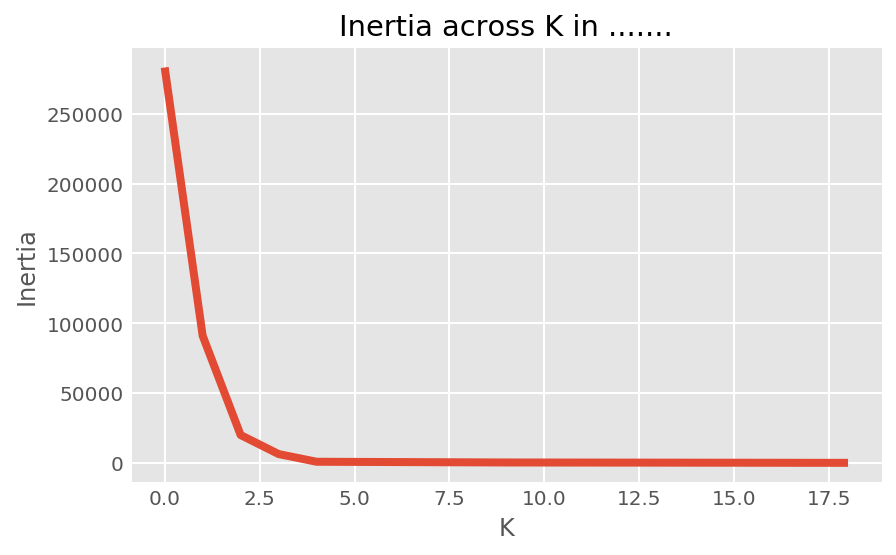

In [21]:
#elbow method:
inertias = []
for n_clusters in range(1,20):
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    inertia = model.inertia_
    inertias.append(inertia.mean())

plt.plot(inertias)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K in .......")
sns.despine()

## Try K-modes

K-means uses the mean distance between points, K-modes uses the most frequent distance between the shapes. For categorical data like shapes this may work better/more intuitive.

In [169]:
from kmodes import kmodes
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# import data
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)

# define X
X = df.drop(df[['shape', 'color']], axis=1)

# scale
ss = StandardScaler()
ss.fit_transform(X)

# Loop through k and append results to df
for k in (2, 3, 4, 5, 6, 7, 8, 9):
    km = kmodes.KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    km.fit_predict(X)
    df[f'{k}-groups'] = km.labels_+1


# display results
df[['color', 'shape', '2-groups', '3-groups', '4-groups', '5-groups', '6-groups',
    '7-groups', '8-groups', '9-groups']].sort_values(by=['9-groups', 'shape'])

,color,shape,2-groups,3-groups,4-groups,5-groups,6-groups,7-groups,8-groups,9-groups
4,green,rectangle,2,3,1,1,6,6,3,1
13,red,rectangle,2,3,1,1,6,6,3,1
22,yellow,rectangle,2,3,1,1,6,6,3,1
31,blue,rectangle,2,3,1,1,6,6,3,1
40,orange,rectangle,2,3,1,1,6,6,3,1
7,green,circle,1,1,1,4,2,1,4,2
16,red,circle,1,1,1,4,2,1,4,2
25,yellow,circle,1,3,1,4,2,1,4,2
34,blue,circle,2,1,1,4,2,1,4,2
43,orange,circle,1,1,1,4,2,1,4,2


## Evalution of K-Modes

Better results in terms of 'more intuitive'. The shapes are distinguished rather than the colors. However the 9-th category (green diamond) is a bit off an odd-ball. This is also typical behavior: the local optimum is found, rather than the overall optimum. 

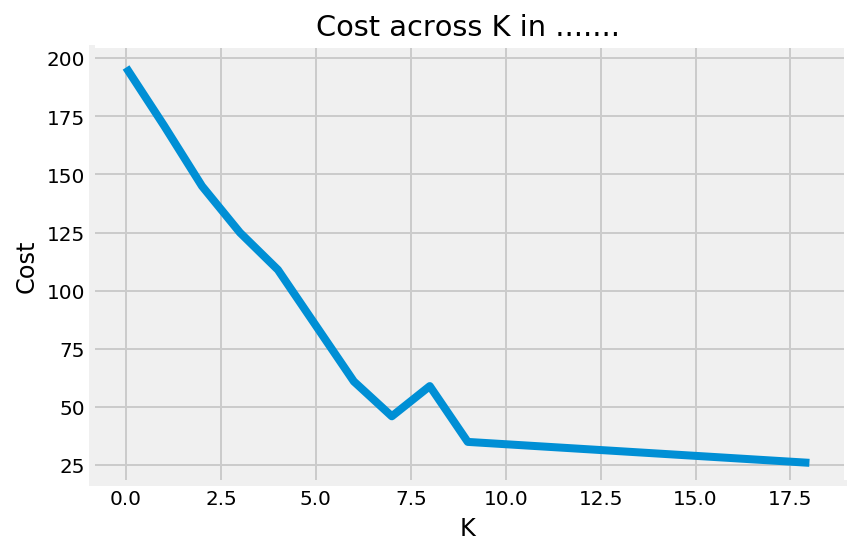

In [282]:
#elbow method (loosely applied to cost!):
costs = []
for k in range(1,20):
    km = kmodes.KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    km.fit(X)
    costs.append(km.cost_)

plt.plot(costs)
plt.ylabel("Cost")
#Clustering cost, defined as the sum distance of all points to their respective cluster centroids.
plt.xlabel("K")
plt.title("Cost across K in .......")
sns.despine()

## Some alternatives

### DBSCAN

With the color *excluded* it works perfectly on shapes. *With* coltemp it recognizes only noise

In [181]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# import data
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)

# define X
X = df.drop(df[['shape', 'color', 'coltemp']], axis=1)

# scale
ss = StandardScaler()
ss.fit_transform(X)



# Loop through eps and append results to df
for eps in (0.2, 0.3, 0.4, 0.5, 0.6):
    scan = DBSCAN(eps=eps)
    scan.fit_predict(X)
    df[f'{eps}-circle'] = scan.labels_+1


# display results
df[['color', 'shape', '0.2-circle',
       '0.3-circle', '0.4-circle', '0.5-circle', '0.6-circle']].sort_values(by=['0.5-circle','color', 'shape'])

,color,shape,0.2-circle,0.3-circle,0.4-circle,0.5-circle,0.6-circle
27,blue,triangle,1,1,1,1,1
0,green,triangle,1,1,1,1,1
36,orange,triangle,1,1,1,1,1
9,red,triangle,1,1,1,1,1
18,yellow,triangle,1,1,1,1,1
28,blue,pentagon,2,2,2,2,2
1,green,pentagon,2,2,2,2,2
37,orange,pentagon,2,2,2,2,2
10,red,pentagon,2,2,2,2,2
19,yellow,pentagon,2,2,2,2,2


In [208]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# import data
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)

# define X
X = df.drop(df[['shape', 'color']], axis=1)

# scale
ss = StandardScaler()
ss.fit_transform(X)



# Loop through eps and append results to df
for eps in (0.2, 0.3, 0.4, 0.5, 0.6):
    scan = DBSCAN(eps=eps)
    scan.fit_predict(X)
    df[f'{eps}-circle'] = scan.labels_


# display results
df[['color', 'shape', '0.2-circle',
       '0.3-circle', '0.4-circle', '0.5-circle', '0.6-circle']].sort_values(by=['0.5-circle','color', 'shape'])

,color,shape,0.2-circle,0.3-circle,0.4-circle,0.5-circle,0.6-circle
34,blue,circle,-1,-1,-1,-1,-1
32,blue,diamond,-1,-1,-1,-1,-1
30,blue,hexagon,-1,-1,-1,-1,-1
33,blue,octagon,-1,-1,-1,-1,-1
28,blue,pentagon,-1,-1,-1,-1,-1
31,blue,rectangle,-1,-1,-1,-1,-1
29,blue,square,-1,-1,-1,-1,-1
27,blue,triangle,-1,-1,-1,-1,-1
35,blue,trirightangle,-1,-1,-1,-1,-1
7,green,circle,-1,-1,-1,-1,-1


### Hierarchical clustering

Essentially constructs trees based on the number of clusters desired.

In [321]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# import data
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)

# define X
X = df.drop(df[['shape', 'color']], axis=1)

# scale
ss = StandardScaler()
ss.fit_transform(X)

# Loop through k and append results to df
for k in (2, 3, 4, 5, 6, 7, 8, 9):
    clf = AgglomerativeClustering(n_clusters=k)
    clf.fit(X)
    df[f'{k}-groups'] = clf.labels_+1   # add 1 to avoid '0'- label)

# display results
df[['color', 'shape', '2-groups', '3-groups', '4-groups', '5-groups', '6-groups',
    '7-groups', '8-groups', '9-groups']].sort_values(by=['2-groups', 'color'])

,color,shape,2-groups,3-groups,4-groups,5-groups,6-groups,7-groups,8-groups,9-groups
27,blue,triangle,1,1,3,3,3,1,4,4
28,blue,pentagon,1,1,3,3,3,1,8,8
29,blue,square,1,1,3,3,3,1,4,4
30,blue,hexagon,1,1,3,3,3,1,8,8
31,blue,rectangle,1,1,3,3,3,1,4,4
32,blue,diamond,1,1,3,3,3,1,4,4
33,blue,octagon,1,1,3,3,3,1,8,8
34,blue,circle,1,1,3,3,3,1,4,4
35,blue,trirightangle,1,1,3,3,3,1,4,4
0,green,triangle,1,1,4,4,4,4,2,1


### Simple example Dendrogram

Dendrogram visually  represents the bottom-up (in this case) built up of the  decision tree. The length of the branch respresnets the distance (big distance, big difference). By choosing a threshold, along the x-axis. The effect on the grouping can be seen (e.g. at 400 gives 2 groups, at 50, 5)

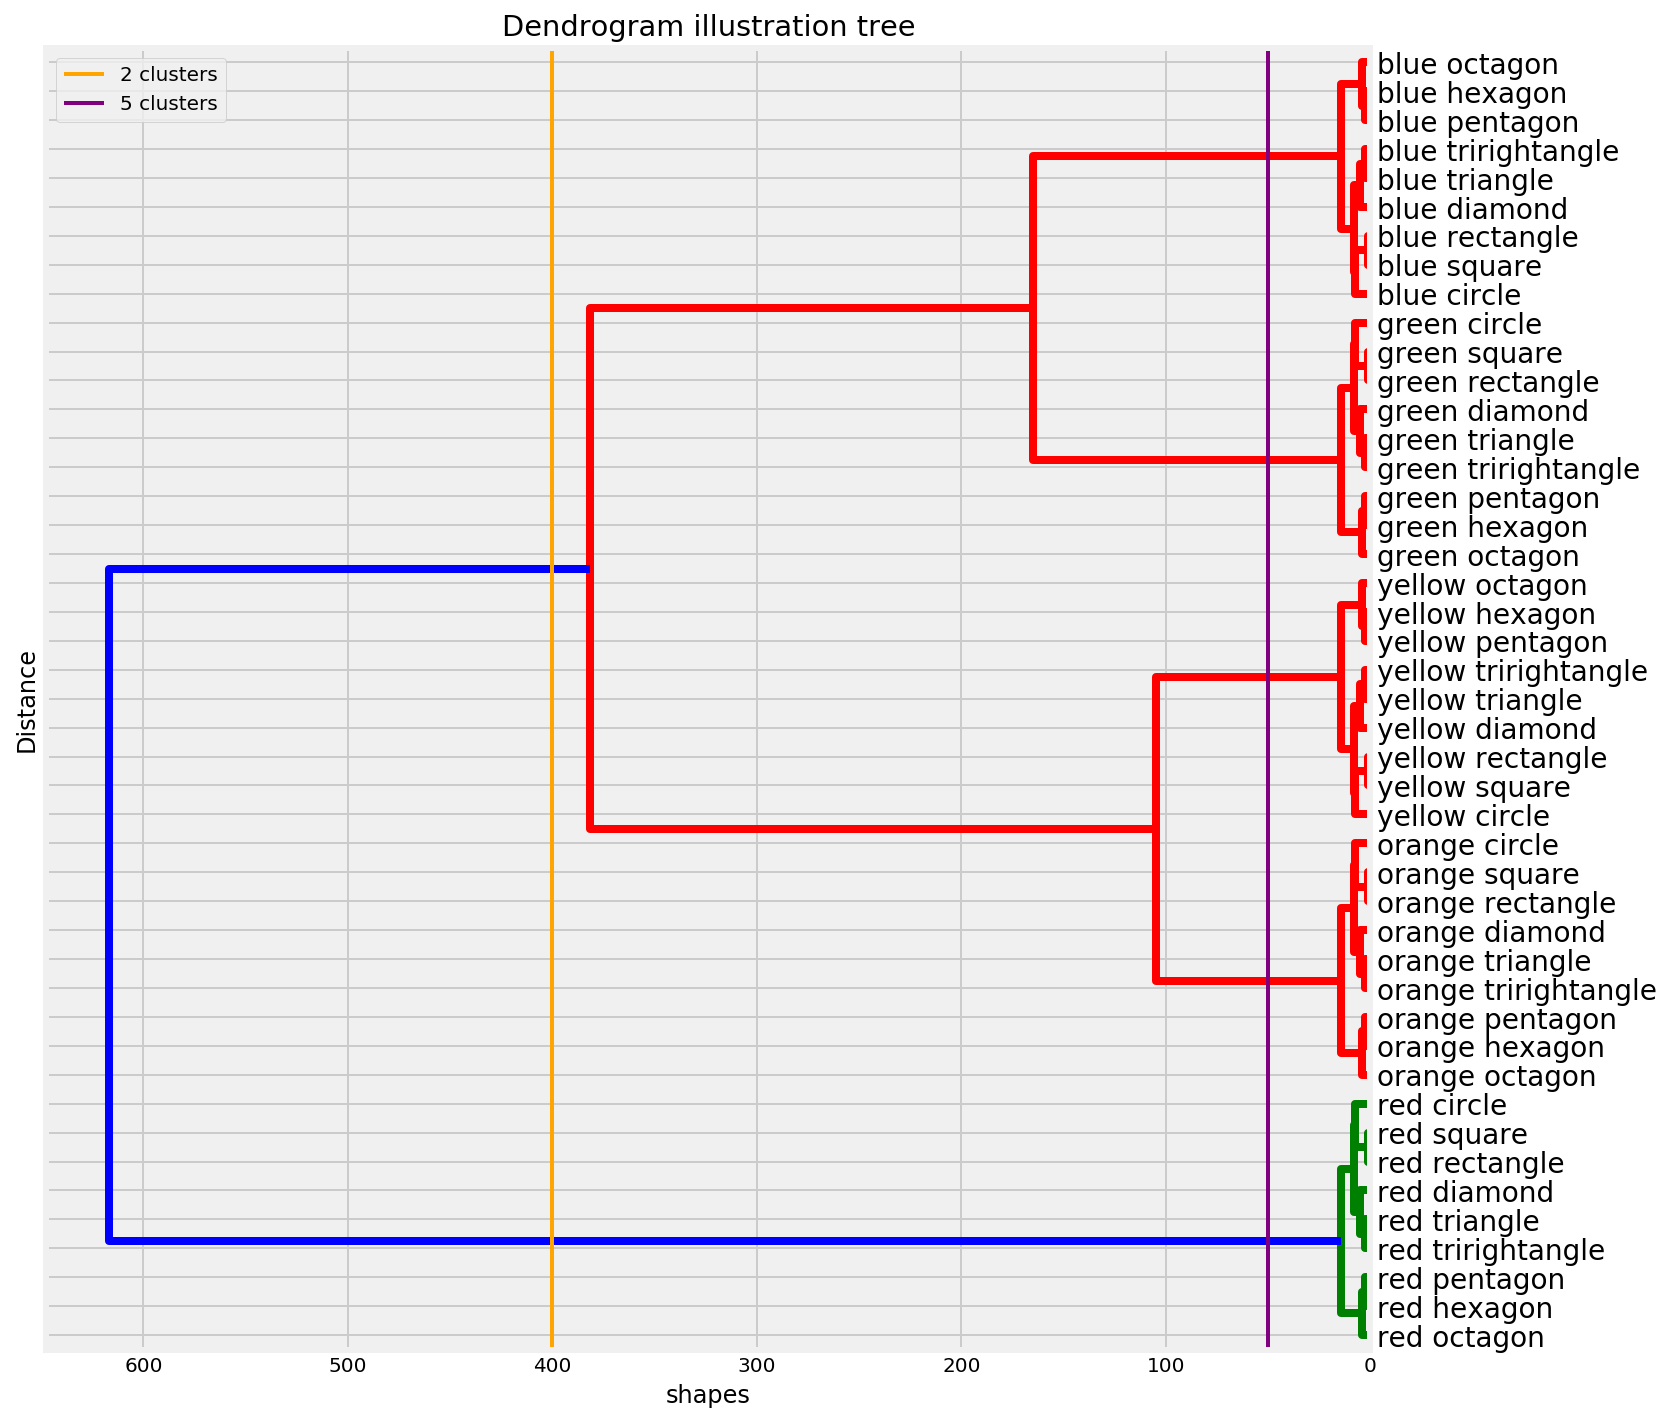

In [322]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

df['new']= df['color']+' '+df['shape']
df_ = df.set_index('new')
data = df_[['coltemp', 'width', 'length', 'diameter', 'angles',
       'sharp angles', 'obtus angles', 'rightangle']]
# scale
ss = StandardScaler()
ss.fit_transform(data)

Z = linkage(data, 'ward'
            , optimal_ordering=True)
fig = plt.figure(figsize=(10, 10))
plt.title('Dendrogram illustration tree')
plt.xlabel('shapes')
plt.ylabel('Distance')
plt. axvline(400, lw = 2, c='orange', label= '2 clusters')
plt. axvline(50, lw = 2,c='purple', label= '5 clusters')
plt.tight_layout()
plt.legend()
dn = dendrogram(Z, orientation = 'left', leaf_font_size=14.,labels=df_.index )  

### Evaluation Hierarchical clustering

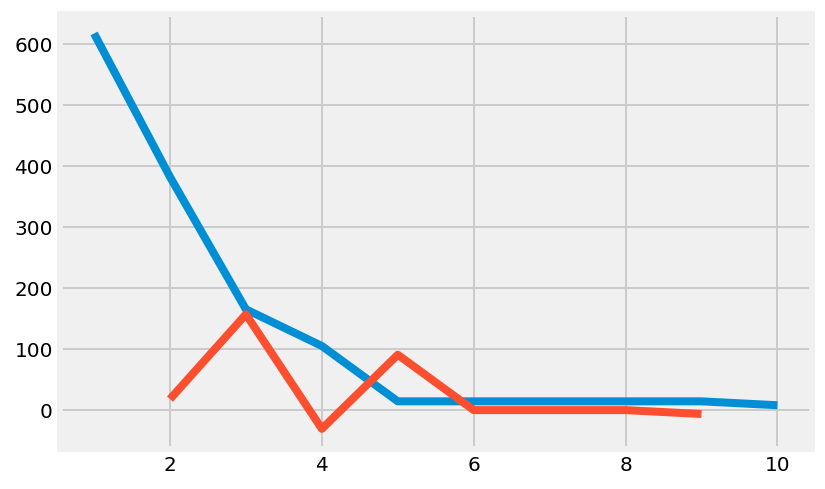

Number of clusters with highest distinctiveness gain: 3


In [267]:
#elbow method
from scipy.cluster.hierarchy import inconsistent
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2) 
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax()+ 2  # if idx 0 is the max of this we want 2 clusters
print(f'Number of clusters with highest distinctiveness gain: {k}')

## Decision Tree

In [319]:
data = 'Desktop/tennis.xlsx'
df = pd.read_excel(data)
from sklearn.preprocessing import StandardScaler
# df['color_'] = df['color']
df = pd.get_dummies(data=df, drop_first=True, columns=['Racket','Partner','Windy','Temperature', 'Outlook', 'Humidity', 'Tennis'])

X = df.drop(df[['Tennis_YES']], axis=1)
y = df['Tennis_YES']
# ss = StandardScaler()
# ss.fit_transform(X)
#K is the (initial) number of points you are looking for



In [318]:
df

,Racket_No,Racket_Yes,Racket_maybe,Partner_No,Partner_Yes,Windy_Strong,Windy_Weak,Temperature_Cool,Temperature_Hot,Outlook_Rain,Outlook_Sunny,Humidity_High,Humidity_Normal,Tennis_NO,Tennis_YES
0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1
3,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1
4,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
5,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1
6,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1
7,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
8,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1
9,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [3]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

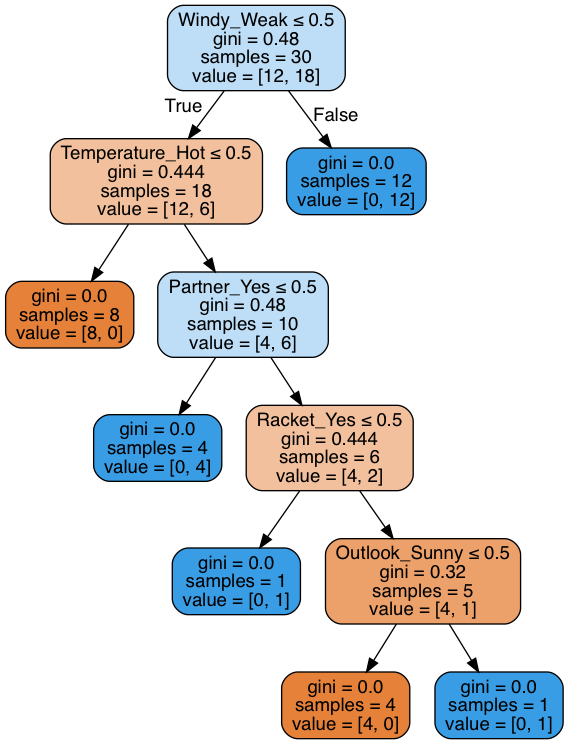

In [29]:
#Print Decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
#from sklearn.tree import export_graphviz
import pydotplus
import pydot


dot_data = StringIO()  

tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns.values)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#tree.export_graphviz(clf, out_file='tree.dot')
Image(graph.create_jpg())  
graph.write_gif('treetennis.gif')
Image(graph.create_png())  

## Appendix visualizing K-Mode 

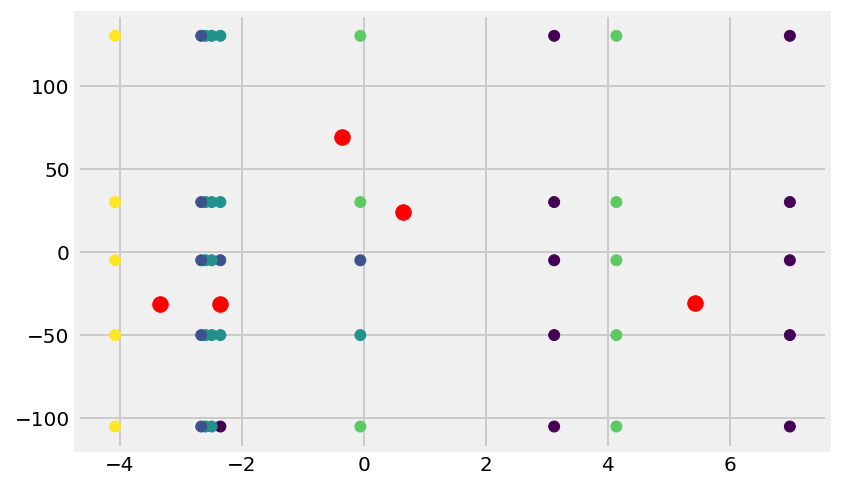

In [301]:

from kmodes import kmodes
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# import data
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)

# define X
X = df.drop(df[['shape', 'color']], axis=1)

# scale
ss = StandardScaler()
ss.fit_transform(X)

km = kmodes.KModes(n_clusters=5, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(X)
df['clusters'] = clusters


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn X into two columns with PCA
plot_columns = pca.fit_transform(X)
plot_centroids = pca.fit_transform(km.cluster_centroids_)


# Plot based on the two dimensions, and shade by cluster label

plt.scatter(x=plot_centroids[:,1], y=plot_centroids[:,0], c='red', s=60)
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df["clusters"], s=30)
plt.show()     



In [302]:
#location of centroids
df__ = pd.DataFrame(km.cluster_centroids_, columns = X.columns)
df__

,coltemp,width,length,diameter,angles,sharp angles,obtus angles,rightangle
0,475,6,6,6,5,0,5,0
1,575,8,6,4,3,2,0,1
2,530,6,5,8,4,0,0,4
3,475,7,6,7,6,0,6,0
4,475,8,8,8,0,0,0,0


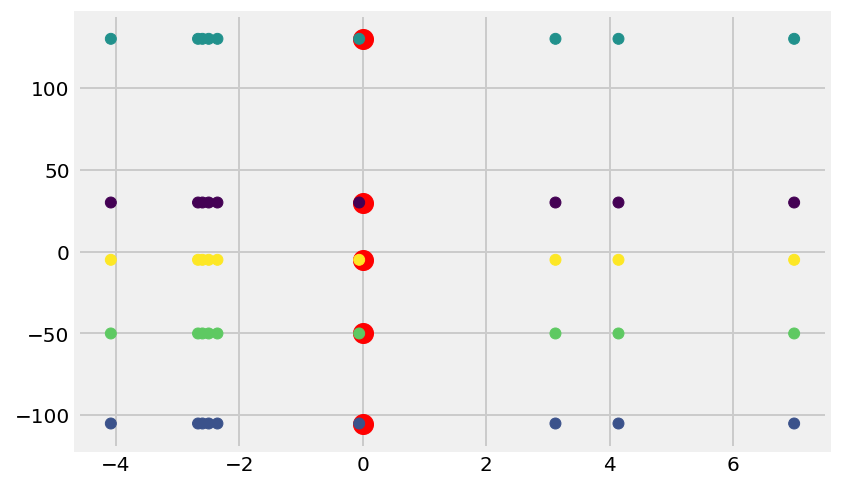

In [314]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# import data
data = 'Desktop/shapes.xlsx'
df = pd.read_excel(data)

# define X
X = df.drop(df[['shape', 'color']], axis=1)

# scale
ss = StandardScaler()
ss.fit_transform(X)

clf = KMeans(n_clusters=5)#, init='Huang', n_init=5, verbose=0)
clusters = clf.fit_predict(X)
df['clusters'] = clusters


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn X into two columns with PCA
plot_columns = pca.fit_transform(X)
plot_centers = pca.fit_transform(clf.cluster_centers_)


# Plot based on the two dimensions, and shade by cluster label

plt.scatter(x=plot_centers[:,1], y=plot_centers[:,0], c='red', s=100)
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df["clusters"], s=30)
plt.show()     




In [311]:
#location of centroids
df__ = pd.DataFrame(clf.cluster_centers_, columns = X.columns)
df__

,coltemp,width,length,diameter,angles,sharp angles,obtus angles,rightangle
0,530.0,6.444444,5.777778,6.555556,4.111111,0.777778,2.333333,1.0
1,710.0,6.444444,5.777778,6.555556,4.111111,0.777778,2.333333,1.0
2,610.0,6.444444,5.777778,6.555556,4.111111,0.777778,2.333333,1.0
3,475.0,6.444444,5.777778,6.555556,4.111111,0.777778,2.333333,1.0
4,575.0,6.444444,5.777778,6.555556,4.111111,0.777778,2.333333,1.0


In [312]:
clf.cluster_centers_

array([[530.        ,   6.44444444,   5.77777778,   6.55555556,
          4.11111111,   0.77777778,   2.33333333,   1.        ],
       [710.        ,   6.44444444,   5.77777778,   6.55555556,
          4.11111111,   0.77777778,   2.33333333,   1.        ],
       [610.        ,   6.44444444,   5.77777778,   6.55555556,
          4.11111111,   0.77777778,   2.33333333,   1.        ],
       [475.        ,   6.44444444,   5.77777778,   6.55555556,
          4.11111111,   0.77777778,   2.33333333,   1.        ],
       [575.        ,   6.44444444,   5.77777778,   6.55555556,
          4.11111111,   0.77777778,   2.33333333,   1.        ]])